In [13]:
from emlp_jax.equivariant_subspaces import drho, drho_lazy, T, rho,rho_lazy,projection_lazy
from emlp_jax.groups import Lorentz,O,SO,SO13p
import numpy as np
from oil.utils.mytqdm import tqdm

In [2]:
rank = (6,0)
G = Lorentz
M = (np.random.randn(G.lie_algebra.shape[0])[:,None,None]*G.lie_algebra).sum(0)

In [4]:
#T(3,3)(Lorentz).show_subspace()

In [5]:
drl = drho_lazy(M,rank)

In [6]:
dr = drho(M,rank)
U,S,VT = np.linalg.svd(dr,full_matrices=True)
rank = (S<1e-6).sum()

In [7]:
c = drl.shape[0]

In [20]:
C = projection_lazy(SO13p(),(6,0))
c = C.shape[-1]

In [21]:
r=30

  0%|          | 0/2000 [00:00<?, ?it/s]

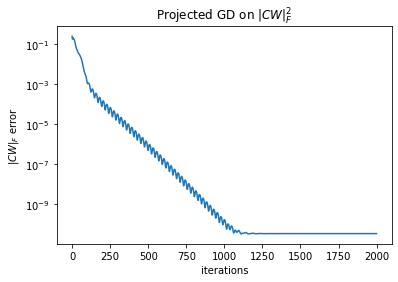

In [22]:
# Projected Gradient descent on \|CW\|^2 with Nesterov Momentum
W = np.random.randn(c,r)
lr = 3e-1
m= .98
v = np.zeros_like(W)
g = np.zeros_like(W)
gradnorms = []
for i in tqdm(range(2000)):
    W /= np.sqrt((W**2).sum(0,keepdims=True))
    #W = np.linalg.qr(W)[0]
    g = AW = C.T@(C@(W-lr*m*v))
    #W -= lr*g
    v += (1-m)*(g-v)
    W -= lr*v
    gradnorms.append(np.sqrt((AW**2).mean()))
import matplotlib.pyplot as plt
plt.plot(np.arange(len(gradnorms)),gradnorms)
plt.title(r'Projected GD on $\|CW\|_F^2$')
plt.yscale('log')
plt.ylabel(r'$\|CW\|_F$ error')
plt.xlabel('iterations')
plt.show()

In [80]:
Q,R = np.linalg.qr(W)

In [81]:
violation = C.T@(C@Q)

In [82]:
np.max(np.abs(violation))

0.004179364720643436